# Simple Linear Regression

In this notebook, I'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [46]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [47]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
# Reading the CSV file, and let's view some sample records

advertising = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Algo/1. Linear Regression/Simple Linear Regression/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Let's inspect the various aspects of our dataframe

In [50]:
advertising.shape

(200, 4)

In [51]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [52]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns

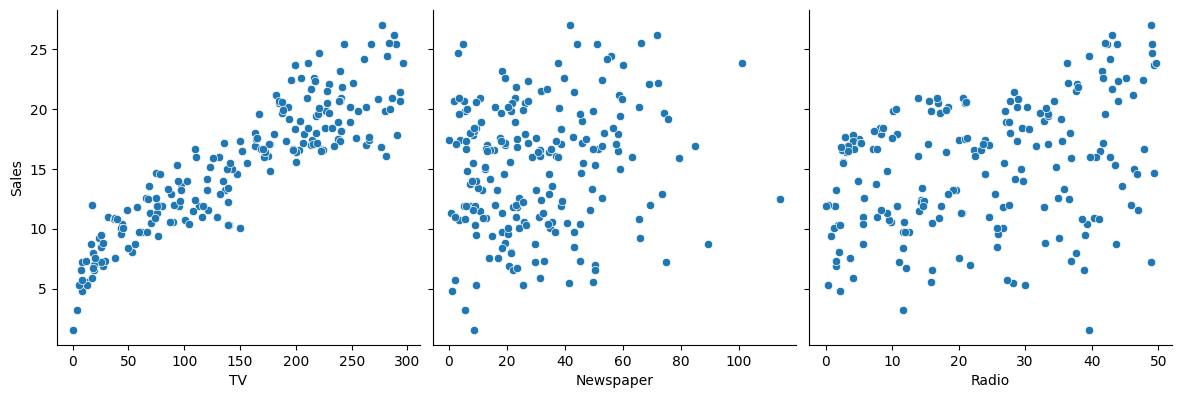

In [54]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

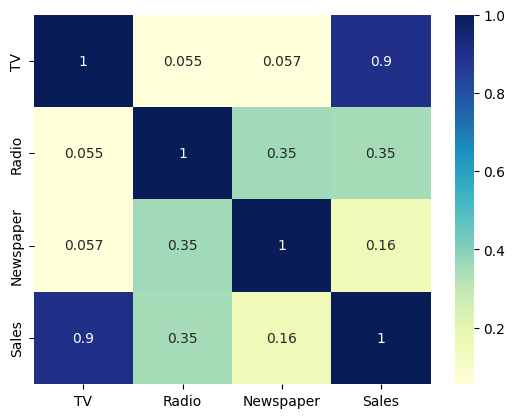

In [55]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [56]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

Correlation matrix and heat map: A correlation matrix is an “nn matrix” with the cells representing the correlation between its corresponding row and column variable. A heat map assigns a color gradient to these values helping us visualize the correlation better.

The correlation coefficient indicates the relationship between the two variables. You can see 
how the correlation between the variables itself is 1. The correlation is positive if there is a positive trend between the variables and negative if there is a negative trend between the variables, meaning when one has an increasing trend and the other has a decreasing trend. The correlation coefficient always lies between [-1,1]. 

###Hypothesis Testing in Linear Regression




Before you move on to the model-building part, there is one theoretical aspect left to be addressed: the significance of the derived beta coefficient. When you fit a straight line through the data, you will obviously get the two parameters of the straight line, i.e., the intercept (β0) and the slope (β1). Now, while β0 is not of much importance right now, there are a few related aspects that need to be checked and verified. every time you perform a linear regression, you need to test whether the fitted line is significant or not, or to simply put it, you need to test whether β1 is significant or not. And here arrives the idea of hypothesis testing on β1. 

You start by saying that β1 is not significant, i.e. there is no relationship between X and y.

So in order to perform the hypothesis test, you first propose the null hypothesis that β1 is 0. And the alternative hypothesis thus becomes β1 is not zero.

    Null Hypothesis (H0): β1=0
    Alternate Hypothesis (HA): β1≠0

Let's first discuss the implications of this hypothesis test. If you fail to reject the null hypothesis, that would mean that β1  is zero, which would simply mean that β1 is insignificant and of no use in the model. Similarly, if you reject the null hypothesis, it would mean that β1 is not zero and the line fitted is a significant one. Now, in order to perform the hypothesis test, you need to derive the p-value for the given beta. If you're hazy on what p-value is and how it is calculated,

Let's do a quick recap of how you calculate p-value anyway:

    Calculate the value of the t-score for the mean point (in this case, zero, according to the null hypothesis 
    that we have stated) on the distribution.
    Calculate the p-value from the cumulative probability for the given t-score using the t-table.
    Make the decision on the basis of the p-value with respect to the given value of β  (significance level)

 

Now, if the p-value turns out to be less than 0.05, you can reject the null hypothesis and state that β1 is indeed significant.

 

Please note that all of the above steps will be performed by Python automatically

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [57]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size = 0.2, random_state= 42)

In [59]:
# Let's now take a look at the train dataset

X_train.head()

79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
Name: TV, dtype: float64

In [60]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [61]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [62]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
print(X_train_sm)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

     const     TV
79     1.0  116.0
197    1.0  177.0
38     1.0   43.1
24     1.0   62.3
122    1.0  224.0
..     ...    ...
106    1.0   25.0
14     1.0  204.1
92     1.0  217.7
179    1.0  165.6
102    1.0  280.2

[160 rows x 2 columns]


In [63]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.007108
TV       0.055483
dtype: float64

In [64]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     689.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.71e-59
Time:                        12:18:43   Log-Likelihood:                -355.76
No. Observations:                 160   AIC:                             715.5
Df Residuals:                     158   BIC:                             721.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0071      0.364     19.274      0.0

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 7.0071+ 0.054 \times TV $

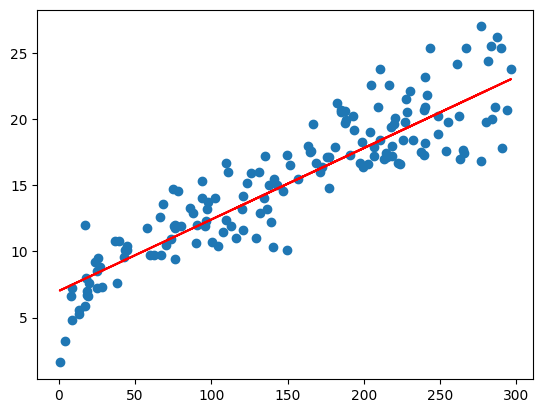

In [65]:
plt.scatter(X_train, y_train) #for scatter points of data
plt.plot(X_train, 7.0071 + 0.054*X_train, 'r') # for the line
plt.show()

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [66]:
y_train_pred = lr.predict(X_train_sm) #predicted
res = (y_train - y_train_pred) #residuals = actual - predicted

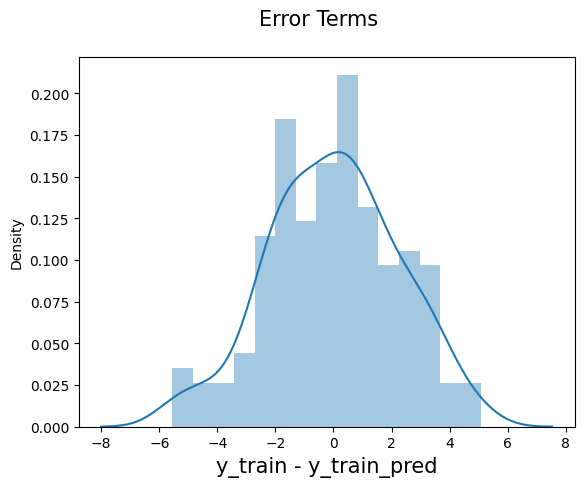

In [67]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

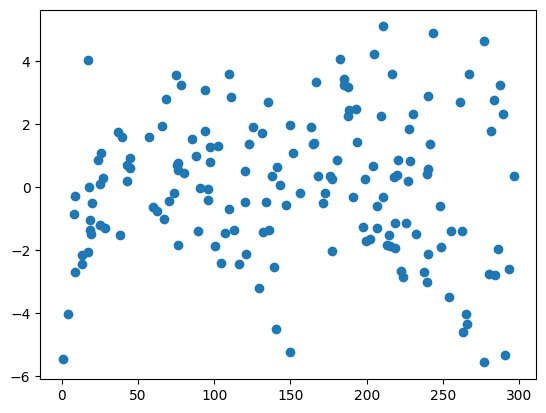

In [68]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [69]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [70]:
y_pred.head()

95     16.067473
15     17.848476
30     23.258063
158     7.656259
128    19.230001
dtype: float64

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [72]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.470035001123256

###### Checking the R-squared on the test set

In [73]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.802561303423698

##### Visualizing the fit on the test set

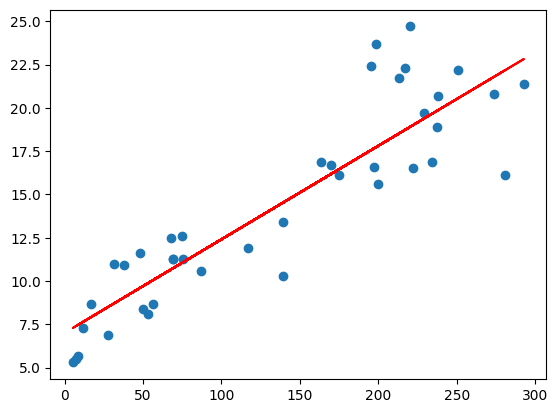

In [74]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.0071 + 0.054 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we have already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [75]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [76]:
X_train_lm.shape

(160,)

In [77]:
from sklearn.linear_model import LinearRegression

#lm = LinearRegression()   # Create a linear regression object
#lm.fit(X_train_lm, y_train_lm)

You saw that shape of X_train_lm is (160,) but regression expects (160,1). Note that your model is expecting a 2D array, failing which you get an error. Therefore, in this case, you need to reshape your variables X_train and X_test into X_train_lm and X_test_lm using the following code:

In [78]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [79]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(160, 1)
(160,)
(40, 1)
(40,)


In [80]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [81]:
print(lm.intercept_)
print(lm.coef_)

6.995532914307688
[0.05410548]


The equationwe get is the same as what we got before!

$ Sales = 6.9995 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [84]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [85]:
X_train_scaled.shape

(140, 1)

In [86]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [87]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [88]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [89]:
# Check the parameters
lr_scaled.params

array([-2.44596010e-16,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [90]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.52e-52
Time:                        12:18:44   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.446e-16      0.037  -6.69e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent